<a href="https://colab.research.google.com/github/Zexsteel900/StockPricePrediction/blob/main/GAN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Streaming output truncated to the last 5000 lines.
39/39 [==============================] - 0s 3ms/step


ValueError: ignored

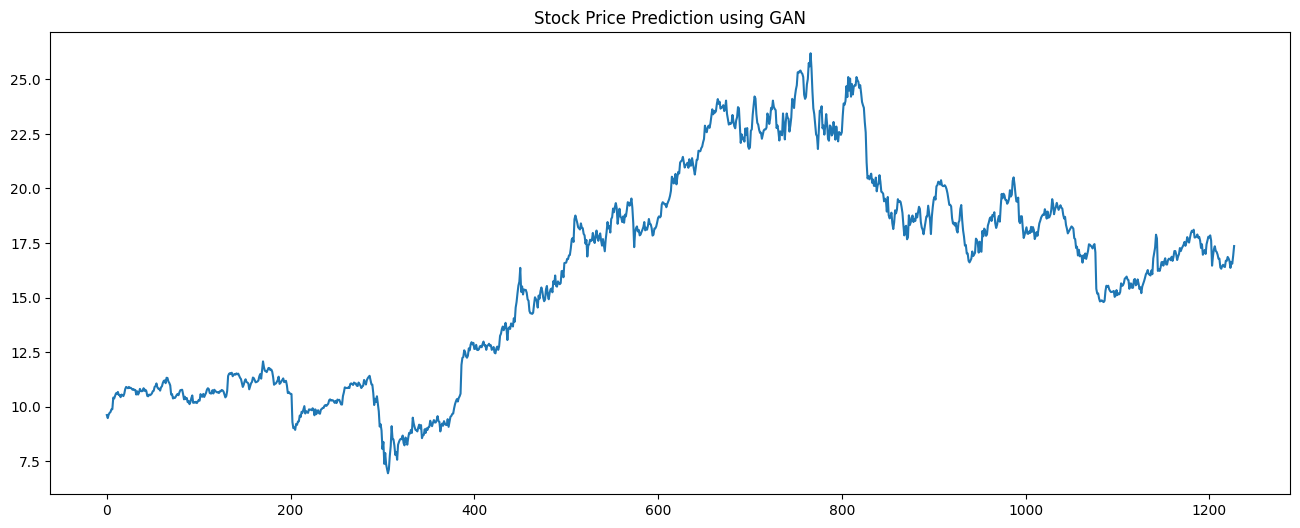

In [21]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Reshape
from keras.optimizers import Adam
yf.pdr_override()
# Download stock data
df = pdr.get_data_yahoo('INFY', start='2019-01-01', end=datetime.now())

# Preprocess the data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for training
seq_length = 10
sequences = []
for i in range(len(scaled_data) - seq_length):
    seq = scaled_data[i:i + seq_length]
    sequences.append(seq)
sequences = np.array(sequences)

# Build the GAN architecture
latent_dim = 100

generator = Sequential([
    Dense(128, input_dim=latent_dim, activation='relu'),
    Dense(seq_length, activation='linear'),
    Reshape((seq_length, 1))
])

discriminator = Sequential([
    Flatten(input_shape=(seq_length, 1)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

gan = Sequential([
    generator,
    discriminator
])

discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
discriminator.trainable = False

gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Train the GAN
epochs = 10000
batch_size = 32

for epoch in range(epochs):
    noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
    generated_data = generator.predict(noise)

    real_data = sequences[np.random.randint(0, sequences.shape[0], batch_size), :, :]

    labels_real = np.ones((batch_size, 1))
    labels_fake = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_data, labels_real)
    d_loss_fake = discriminator.train_on_batch(generated_data, labels_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
    labels_gan = np.ones((batch_size, 1))

    g_loss = gan.train_on_batch(noise, labels_gan)



# Generate synthetic stock price sequences
num_samples = len(sequences)
noise_gan = np.random.normal(0, 1, size=(num_samples, latent_dim))
generated_data_gan = generator.predict(noise_gan)

# Rescale the data back to the original range
generated_data_gan = scaler.inverse_transform(generated_data_gan.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(16, 6))
plt.title('Stock Price Prediction using GAN')
plt.plot(data, label='Real Stock Prices')
plt.plot(np.arange(seq_length, len(data)), generated_data_gan, label='Generated Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


39/39 [==============================] - 0s 2ms/step


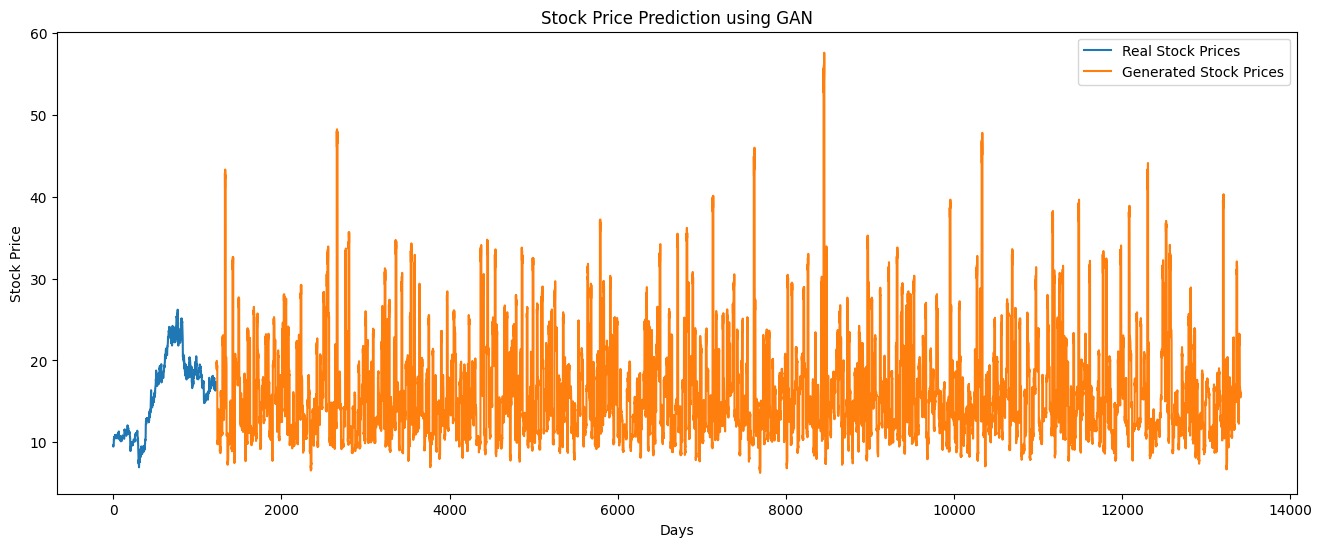

In [22]:

# Generate synthetic stock price sequences
num_samples = len(sequences)
noise_gan = np.random.normal(0, 1, size=(num_samples, latent_dim))
generated_data_gan = generator.predict(noise_gan)

# Rescale the data back to the original range
generated_data_gan = scaler.inverse_transform(generated_data_gan.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(16, 6))
plt.title('Stock Price Prediction using GAN')
plt.plot(data, label='Real Stock Prices')

# Plot the generated stock prices after the last real stock price
plt.plot(np.arange(len(data), len(data) + len(generated_data_gan)), generated_data_gan, label='Generated Stock Prices')

plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
